In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [11]:
df.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,74.924952,0.70375,173.447166,99.841525,502.246625,4.977500,709.167849
std,14.496298,0.45666,72.298671,9.888547,99.222767,2.259816,199.497621
min,50.003622,0.00000,50.062655,66.724469,102.007518,0.000000,108.252421
25%,62.380142,0.00000,108.734463,93.101146,435.810131,3.000000,576.382146
50%,74.630855,1.00000,175.596395,99.762840,502.877959,5.000000,722.532738
75%,87.792071,1.00000,235.200606,106.447769,568.249383,6.000000,847.814106
max,99.998898,1.00000,299.992054,138.520202,876.694217,15.000000,1406.110705


In [12]:
# Example feature selection
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']]
y = df['Yield_kg_per_hectare'] # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [15]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train.shape[1],)), # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# MEan squared error and mean absolute error

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, verbose = 1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2788.8784 - mae: 42.1198 - val_loss: 2703.3706 - val_mae: 42.4014
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2705.6467 - mae: 41.7686 - val_loss: 2678.3164 - val_mae: 42.0498
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2633.9033 - mae: 40.9323 - val_loss: 2682.4941 - val_mae: 42.2060
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2757.9680 - mae: 41.8866 - val_loss: 2687.5969 - val_mae: 42.1641
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2714.1721 - mae: 41.5262 - val_loss: 2686.1960 - val_mae: 41.9523
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2667.7998 - mae: 40.8593 - val_loss: 2697.4849 - val_mae: 42.0211
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2605.6541 - mae: 41.1109 - val_loss: 2770.7319 - val_mae: 42.8751
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2677.7310 - mae: 41.1220 - val_loss: 2678.6582 - val_mae: 42.0504
Epoch 9/

In [43]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2614.1870 - mae: 41.5989 
Test Mean Absolute Error:  39.63


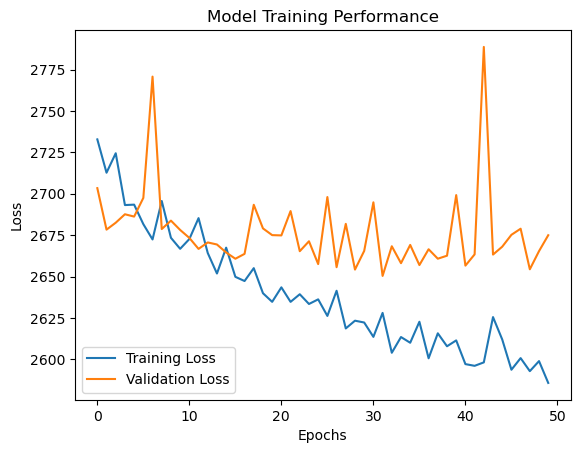

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_11412\752915531.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\acer\AppData\Local\Temp\ipykernel_11412\752915531.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


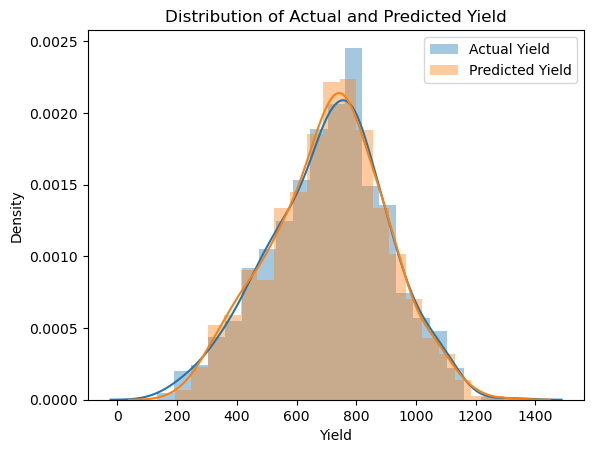

In [49]:
import seaborn as sns
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [51]:
predictions = model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 447.72318],
       [ 684.15515],
       [1081.8823 ],
       [ 662.54504],
       [ 816.15894],
       [1001.0835 ],
       [ 308.0969 ],
       [ 601.5651 ],
       [ 455.9657 ],
       [ 810.08844],
       [ 612.3562 ],
       [ 680.2829 ],
       [ 625.75934],
       [ 752.2328 ],
       [ 857.96356],
       [ 688.27295],
       [ 963.2824 ],
       [ 472.51807],
       [ 581.0926 ],
       [ 368.45547],
       [ 801.4289 ],
       [ 810.761  ],
       [ 375.29285],
       [ 832.664  ],
       [1019.22626],
       [ 597.4606 ],
       [ 658.6734 ],
       [ 978.8808 ],
       [ 638.51263],
       [ 638.80396],
       [ 690.89453],
       [ 814.21124],
       [ 837.5151 ],
       [ 794.5251 ],
       [ 493.43088],
       [ 719.4926 ],
       [ 729.96674],
       [1024.0059 ],
       [ 211.81537],
       [ 664.9293 ],
       [ 935.16956],
       [ 890.1572 ],
       [ 787.57404],
       [ 764.0577 ],
       [ 615.9913 ],
       [ 841.97955],
       [ 621.1988 ],
       [ 572.

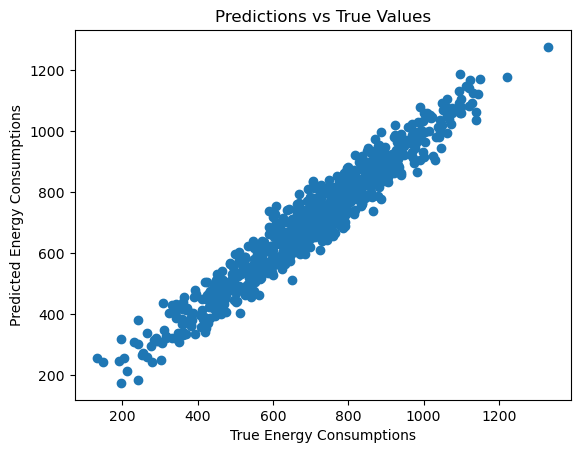

In [55]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumptions')
plt.ylabel('Predicted Energy Consumptions')
plt.title('Predictions vs True Values')
plt.show()